In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#for deep learning model
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import yfinance as yf

In [15]:
# loading dataframe
df = pd.read_csv("DATA_MSFT.csv")
#df.reset_index(inplace=True)
df.rename(lambda x: x.strip('*').replace(' ', '_').lower(), axis='columns', inplace=True)
df

,date,open,high,low,close,adj_close,volume
0,1999-12-31,58.750000,58.875000,58.125000,58.375000,36.991508,12517600
1,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.932102,53228400
2,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.684532,54119000
3,2000-01-05,55.562500,58.187500,54.687500,56.906250,36.060772,64059600
4,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.852810,54976600
...,...,...,...,...,...,...,...
5404,2021-06-24,266.160004,267.850006,265.470001,266.690002,266.690002,21446900
5405,2021-06-25,266.230011,267.250000,264.760010,265.019989,265.019989,25611100
5406,2021-06-28,266.190002,268.899994,265.910004,268.720001,268.720001,19590000
5407,2021-06-29,268.869995,271.649994,267.980011,271.399994,271.399994,19937800


In [16]:
open_price = df.iloc[:,1:2]
train_set = open_price[:2000].values
test_set = open_price[2000:].values
print("Train size: ", train_set.shape)
print("Test size: ", test_set.shape)

Train size:  (2000, 1)
Test size:  (3409, 1)


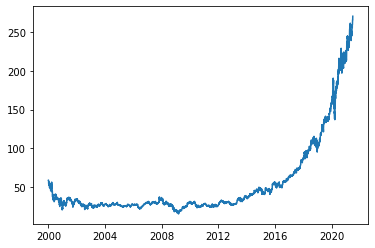

In [17]:
dates = pd.to_datetime(df['date'])
plt.plot_date(dates, open_price, fmt='-')
plt.savefig("Test_Open_Price.png")

In [19]:
scaler = MinMaxScaler()
train_set_scaled = scaler.fit_transform(train_set)
train_set_scaled.shape

(2000, 1)

In [23]:
x_train = []
y_train = []
for i in range(60,2000):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1940, 60, 1)

In [24]:
reg = Sequential()
reg.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))
reg.compile(optimizer='adam', loss='mean_squared_error')
reg.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

2021-07-05 21:30:43.022971: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-05 21:30:44.933389: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1940/1940 - 176s - loss: 0.0037
Epoch 2/20
1940/1940 - 149s - loss: 0.0017
Epoch 3/20
1940/1940 - 160s - loss: 0.0017
Epoch 4/20
1940/1940 - 138s - loss: 0.0012
Epoch 5/20
1940/1940 - 140s - loss: 0.0010
Epoch 6/20
1940/1940 - 142s - loss: 0.0011
Epoch 7/20
1940/1940 - 131s - loss: 0.0010
Epoch 8/20
1940/1940 - 137s - loss: 8.4211e-04
Epoch 9/20
1940/1940 - 120s - loss: 9.3147e-04
Epoch 10/20
1940/1940 - 111s - loss: 8.7162e-04
Epoch 11/20
1940/1940 - 406s - loss: 7.0028e-04
Epoch 12/20
1940/1940 - 130s - loss: 7.1782e-04
Epoch 13/20
1940/1940 - 743s - loss: 7.3740e-04
Epoch 14/20
1940/1940 - 121s - loss: 6.8411e-04
Epoch 15/20
1940/1940 - 107s - loss: 8.1000e-04
Epoch 16/20
1940/1940 - 107s - loss: 5.8871e-04
Epoch 17/20
1940/1940 - 109s - loss: 6.3161e-04
Epoch 18/20
1940/1940 - 108s - loss: 6.2885e-04
Epoch 19/20
1940/1940 - 107s - loss: 6.3372e-04
Epoch 20/20
1940/1940 - 108s - loss: 6.6785e-04


In [28]:
input = open_price[len(open_price) - len(test_set) - 60:].values
input.shape
input = scaler.transform(input)

In [29]:
x_test = []
for i in range(60,95):
    x_test.append(input[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(35, 60, 1)

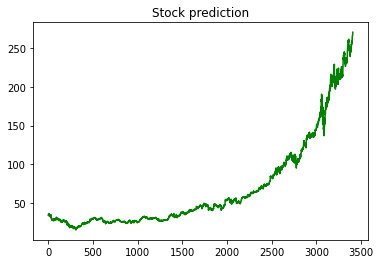

In [33]:
pred = reg.predict(x_test)
pred = scaler.inverse_transform(pred)
plt.plot(pred, color='red')
plt.plot(test_set, color='green')
plt.title('Stock prediction')
plt.show()